# Medidad númericas

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# Cambiamos el directorio local a donde tenemos nuestras bases de datos
os.chdir('BasesDatos/')

In [11]:
# Cargar la base de datos con la que se va a trabajar
df_ventas = pd.read_excel('ventas.xlsx')

In [12]:
df_ventas.head()

,NoFactura,Producto,Cantidad,FechaFactura,PrecioUnidad,Pais
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom


# Limpieza basica de la base de datos

In [13]:
# Descriptiva basica de las variables numericas
df_ventas.describe()

,Cantidad,PrecioUnidad
count,250803.000000,250803.000000
mean,9.316336,5.071779
std,218.373883,117.428308
min,-74215.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.150000
max,74215.000000,38970.000000


In [14]:
# Conocer el tipo de variables de la base de datos
df_ventas.dtypes

NoFactura        object
Producto         object
Cantidad          int64
FechaFactura     object
PrecioUnidad    float64
Pais             object
dtype: object

In [15]:

df_ventas.Cantidad = np.where(df_ventas.Cantidad<=0, 0, df_ventas.Cantidad)

In [16]:
df_ventas = df_ventas.fillna(0)

## Media datos no agrupados

Se debe usar cuando las distribución de los datos es simetrica y no presenta valores extremos.

$$\bar{X}=\frac{\sum_{i=1}^nX_i}{n} \ i= 1, 2, 3, \dots, n$$

In [17]:
# Conocer el promedio columns ventas
df_ventas.Cantidad.mean()

10.298792279199212

In [18]:
tabla_barras = pd.DataFrame(df_ventas.Cantidad.value_counts()).reset_index()

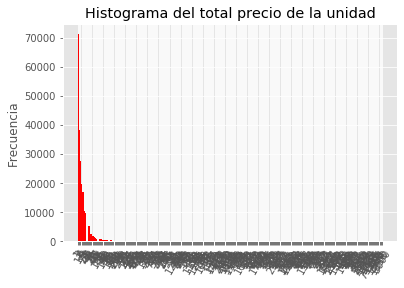

In [19]:
# Seleccionar estilo de grafico ggplot
plt.style.use('ggplot')



# Contruir un histograma
plt.bar(range(tabla_barras.shape[0]),tabla_barras.Cantidad, color='r')

# poner nombre al eje Y
plt.ylabel('Frecuencia')

# Poner titulo a la grafica
plt.title('Histograma del total precio de la unidad')

# Etiquetas de barras
plt.xticks(range(tabla_barras.shape[0]), tabla_barras['index'], rotation=60)


# Mostrar el grafico
plt.show()

In [20]:
tabla_barras = tabla_barras[(tabla_barras['index'] < 10)]

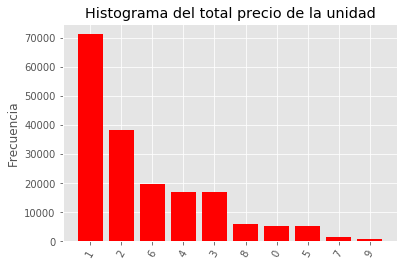

In [22]:
# Seleccionar estilo de grafico ggplot
plt.style.use('ggplot')

# Contruir un histograma
plt.bar(range(tabla_barras.shape[0]),tabla_barras.Cantidad, color='r')

# poner nombre al eje Y
plt.ylabel('Frecuencia')

# Poner titulo a la grafica
plt.title('Histograma del total precio de la unidad')

# Etiquetas de barras
plt.xticks(range(tabla_barras.shape[0]), tabla_barras['index'], rotation=60)


# Mostrar el grafico
plt.show()

<div class="alert alert-info">
El valor promedio de la variable cantidad es <strong>10.3</strong> por lo que se espera que los valores de esta variable se agrupen alrededor de 10.3. Sin embargo como la distribución no es simétrica este valor no representa en gran medida el conjunto de datos.
<div>

## Media datos  agrupados

Se debe usar cuando las distribución de los datos es simetrica y no presenta valores extremos.

$$\bar{X}=\frac{\sum_{i=1}^nf_iX_i}{n} \ i= 1, 2, 3, \dots, n$$

In [23]:
def tablas_clases(df, columna, cabecera=True, k = 'default'):
    from math import ceil
    minimo = df[str(columna)].min()
    maximo = df[str(columna)].max() + 1 
    rango = maximo - minimo
    
    if k == 'default':
        k = ceil(1 + 3.333 * np.log10(df.shape[0]))


    amplitud = rango / k

    valor = minimo
    lista = [minimo]
    for _ in range(k):
        valor += amplitud
        lista.append(round(valor, 0))

    conteo = 0 
    diccionario = {}
    lista_x = []
    for i in range(len(lista)-1):
        for j in df[str(columna)]: 
            if lista[i] <= j and j < lista[i+1]:
                conteo += 1
            diccionario['['+str(lista[i])+', '+str(lista[i+1])+')'] = [conteo]
        conteo = 0
        lista_x.append(lista[i] + ((lista[i+1]-lista[i])/2))



    tabla_frecuencia = pd.DataFrame(diccionario).T

    tabla_frecuencia.columns = ['Frecuencia']

    # Contruimos la columna de frecuencia relativa
    tabla_frecuencia['Frecuencia_relativa'] = tabla_frecuencia.Frecuencia / tabla_frecuencia.Frecuencia.sum() 

    # Frecuencia relativa acumulada
    fr = []
    suma = 0
    for i in tabla_frecuencia.Frecuencia_relativa:
        suma += i
        fr.append(suma)
    tabla_frecuencia['Frecuencia relativa acumulada'] = fr
  
    # Contruimos la variable porcentaje
    tabla_frecuencia['Porcentaje'] = tabla_frecuencia.Frecuencia_relativa.apply(lambda x: str(round(x * 100, 2)) + "%")

    
    # centro de clase
    tabla_frecuencia['xi'] = lista_x
    #print(lista_x)
    
    if cabecera:
        salida = tabla_frecuencia.head()
    else:
        salida = tabla_frecuencia
    
    # Imprimir dimensiones 
    print('Las dimensiones de la tabla es: ', tabla_frecuencia.shape)
    
    return salida

In [33]:
df_cantidad = tablas_clases(df_ventas, 'Cantidad', cabecera=False, k = 40)

Las dimensiones de la tabla es:  (40, 5)


In [34]:
df_cantidad

,Frecuencia,Frecuencia_relativa,Frecuencia relativa acumulada,Porcentaje,xi
"[0, 1855.0)",250782,0.999916,0.999916,99.99%,927.5
"[1855.0, 3711.0)",16,0.000064,0.999980,0.01%,2783.0
"[3711.0, 5566.0)",3,0.000012,0.999992,0.0%,4638.5
"[5566.0, 7422.0)",1,0.000004,0.999996,0.0%,6494.0
"[7422.0, 9277.0)",0,0.000000,0.999996,0.0%,8349.5
"[9277.0, 11132.0)",0,0.000000,0.999996,0.0%,10204.5
"[11132.0, 12988.0)",0,0.000000,0.999996,0.0%,12060.0
"[12988.0, 14843.0)",0,0.000000,0.999996,0.0%,13915.5
"[14843.0, 16699.0)",0,0.000000,0.999996,0.0%,15771.0
"[16699.0, 18554.0)",0,0.000000,0.999996,0.0%,17626.5


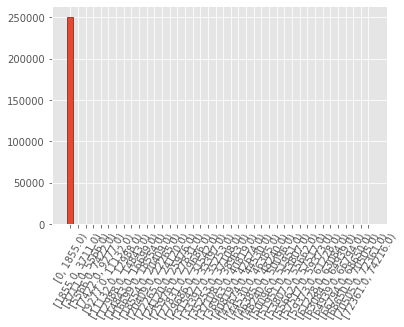

In [35]:
plt.bar(range(df_cantidad.shape[0]), df_cantidad.Frecuencia, edgecolor='black')
plt.xticks(range(df_cantidad.shape[0]), df_cantidad.index.tolist(), rotation=60)
plt.show()

In [17]:
df_cantidad['producto'] = df_cantidad.Frecuencia * df_cantidad.xi

In [18]:
df_cantidad.producto.sum() / df_cantidad.Frecuencia.sum()

1953.3426354549188


<div class="alert alert-info">
El valor promedio de la variable cantidad en clases agrupadas es <strong>27993.4</strong> por lo que se espera que los valores de esta variable se agrupen alrededor de este valor.
<div>

## Moda datos no agrupados

Es el valor mas frecuente

In [19]:
tabla_barras = pd.DataFrame(df_ventas.Cantidad.value_counts()).reset_index()

In [20]:
def moda(df, variable):
    tabla = pd.DataFrame(df[str(variable)].value_counts())
    return (tabla.sort_values('Cantidad', ascending=False).reset_index().iloc[0,:])['index']

In [21]:
moda(df_ventas, 'Cantidad')

1

## Percentiles datos no agrupados

El percentil, es un valor de la población que separa una porción del resto. Se representa como $X_p$ donde p es la proporción de la población que queremos separar.

Primero se debe ordenar la problación de menor a mayor.

Calculamos el $X_p$ de la siguiente forma(n = tamaño de la población)

* Si $np$ es natural  $X_p =\frac{ X_{(np)} + x_{(np+1)}}{2}$
* Si $np$ no es natural $X_{([[np]] +1)}$

In [23]:
def percentil(porcentaje, df, columna):
    p = porcentaje
    n = len(df[str(columna)]) 
    df = pd.DataFrame(df[str(columna)].sort_values(ascending=True))
    if (n * p) is int:
        Xp = int(df.iloc[n*p -1,:]) +int(df.iloc[n*p,:])/2
    else:
        Xp = int(df.iloc[int(n*p),:])
    
    return Xp    



In [24]:
percentil(0.5, df_ventas, 'Cantidad')

3

## Variaza  datos no agrupados

Cuantifica la variabilidad existente entre la información  con respecto a la media.

* $$S^2=\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{n-1}$$

<br>

* $$DM = \sqrt(\frac{\sum_{i=1}^n(X_i - Xm)^2}{n-1})$$

In [25]:
df_ventas.Cantidad.var()

23766.48358905079

In [26]:
varianza = 0
m = df_ventas.Cantidad.quantile(0.5)
n = len(df_ventas.Cantidad)
for v in df_ventas.Cantidad:
    dm = (v - m)**2 
    varianza += dm 
varianza / n-1

23818.661196237685

## El rango intercuarticulo 

Diferentes entre el percentil 75 y el 25. Mide la disperción del 50% mas central por lo que es ideal para varianzaciones en distribuciones sesgadas.

In [27]:
RI = df_ventas.Cantidad.quantile(0.75) - df_ventas.Cantidad.quantile(0.25)
RI

9.0

## Coeficiente de variación en datos no agrupados


$$C.V= \frac{S}{X}$$ Se usa para comparar variabilidad de dos o más conjunto de datos.

In [28]:
CV = np.sqrt(df_ventas.Cantidad.var()) / df_ventas.Cantidad.mean()
CV

14.96911642098783

## Percentiles en datos agrupados

La idea es contruir un **Histograma de Frecuencias relativas Acumuladas** el cual computa la frecuencia relativa acumulada para cada rango de clase. Este grafico consolida  un  grafico continuo formado por lineas rectas, por lo que para determinar el valor de $P_x$ donde $x$ es el porcentaje de interes.

 $$y = mx + b$$
 
 $$m = \frac{y2-y1}{x2-x1}$$

$$y - y_0 = m(x-x_0)$$

$$y-y_0=mx-m*x_0$$

$$x = \frac{(y-yo)+ x_0*m}{m}$$

Reescribiendo la formula

$$X_p = L + \frac{(p-a)* h}{f}$$


Donde:
* $L:$ Límite inferior de la clase que contiene al percentil.
* $f:$ Frecuencia relativa del intervalo que contiene el percentil.
* $a:$ Frecuencia relativa acumulada del intervalo anterior al que contiene el percentil.
* $h:$ Longitud del intervalo que contiene al percentil.
* $p:$ Proporción sociada al percentil.

Si se quiere determinar cual intervalo contiene al percentil , miramos cual intervalo tiene una frecuencia relativa acumulada igual o superior a $p$.

In [42]:
df_cantidad = tablas_clases(df_ventas[df_ventas['Cantidad']< 164], 'Cantidad', cabecera=False)

Las dimensiones de la tabla es:  (19, 5)


In [43]:
df_cantidad.head()

,Frecuencia,Frecuencia_relativa,Frecuencia relativa acumulada,Porcentaje,xi
"[0, 9.0)",181030,0.725251,0.725251,72.53%,4.5
"[9.0, 17.0)",41419,0.165935,0.891186,16.59%,13.0
"[17.0, 26.0)",15933,0.063832,0.955018,6.38%,21.5
"[26.0, 35.0)",1420,0.005689,0.960707,0.57%,30.5
"[35.0, 43.0)",2156,0.008637,0.969344,0.86%,39.0


In [123]:
def percentil_agrupado(p, tabla_agrupada):
   
    # Frecuencia relativa intervalo anterior
    dimension = tabla_agrupada[tabla_agrupada['Frecuencia relativa acumulada'] < p].shape
    dimension = dimension[0]-1
    if dimension < 0:
        dimension = 0
    a = df_cantidad.iloc[dimension].iloc[2]
    # Intervalo con frecuencua relatica mayor o igual a p
    intervalo = tabla_agrupada[tabla_agrupada['Frecuencia relativa acumulada'] >= p].iloc[0]

    # Extraer rango
    rango = intervalo.reset_index().columns[1]
    rango = re.sub("\[|\)", "", rango)
    lista_rango = rango.split(',')
    lista_rango = [float(e) for e in lista_rango]

    L = lista_rango[0]

    f = intervalo[1]

    h = lista_rango[1] - lista_rango[0]

    Xp = L + ((p-a) * h) / f
    
    Xp = abs(Xp) 
    
    return Xp

In [124]:
percentil_agrupado(0.5, df_cantidad)

2.7952549301220797

In [126]:
df_cantidad.head()

,Frecuencia,Frecuencia_relativa,Frecuencia relativa acumulada,Porcentaje,xi
"[0, 9.0)",181030,0.725251,0.725251,72.53%,4.5
"[9.0, 17.0)",41419,0.165935,0.891186,16.59%,13.0
"[17.0, 26.0)",15933,0.063832,0.955018,6.38%,21.5
"[26.0, 35.0)",1420,0.005689,0.960707,0.57%,30.5
"[35.0, 43.0)",2156,0.008637,0.969344,0.86%,39.0


# Varianza en datos agrupados 

$$S_a^2 = \frac{\sum_{i=1}^k (m_i - \bar{X}_{a})^2 * f_i}{n-1}$$

In [144]:
def varianza_agrupada(tabla_agrupada):
    media = np.sum(tabla_agrupada.xi * tabla_agrupada.Frecuencia)/tabla_agrupada.Frecuencia.sum()
    n = 0
    s = 0
    for r in range(tabla_agrupada.shape[0]):
        m = tabla_agrupada.iloc[r, 4]
        f = tabla_agrupada.iloc[r, 0]
        n += f
        Si = ((m - media) ** 2 )* f
        s += Si
    s = s/n
    return s

In [145]:
varianza_agrupada(df_cantidad)

206.59772052783813